In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [85]:
from sklearn import datasets
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

## loading in the data 

In [86]:
iris = datasets.load_iris()
X = iris.data   # Get training attributes
y = iris.target # Get labels
input_size = X.shape[-1]
cats = np.sum(np.unique(y)).astype(int)
print('Number of samples:', X.shape[0])    # 150
print('Number of attributes:', input_size) # 4
print('Number of categories:', cats)       # 3

Number of samples: 150
Number of attributes: 4
Number of categories: 3


<ipython-input-87-6f840ee13795>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, figsize=(12,12), c=y, s=200, alpha=1, ax=ax);


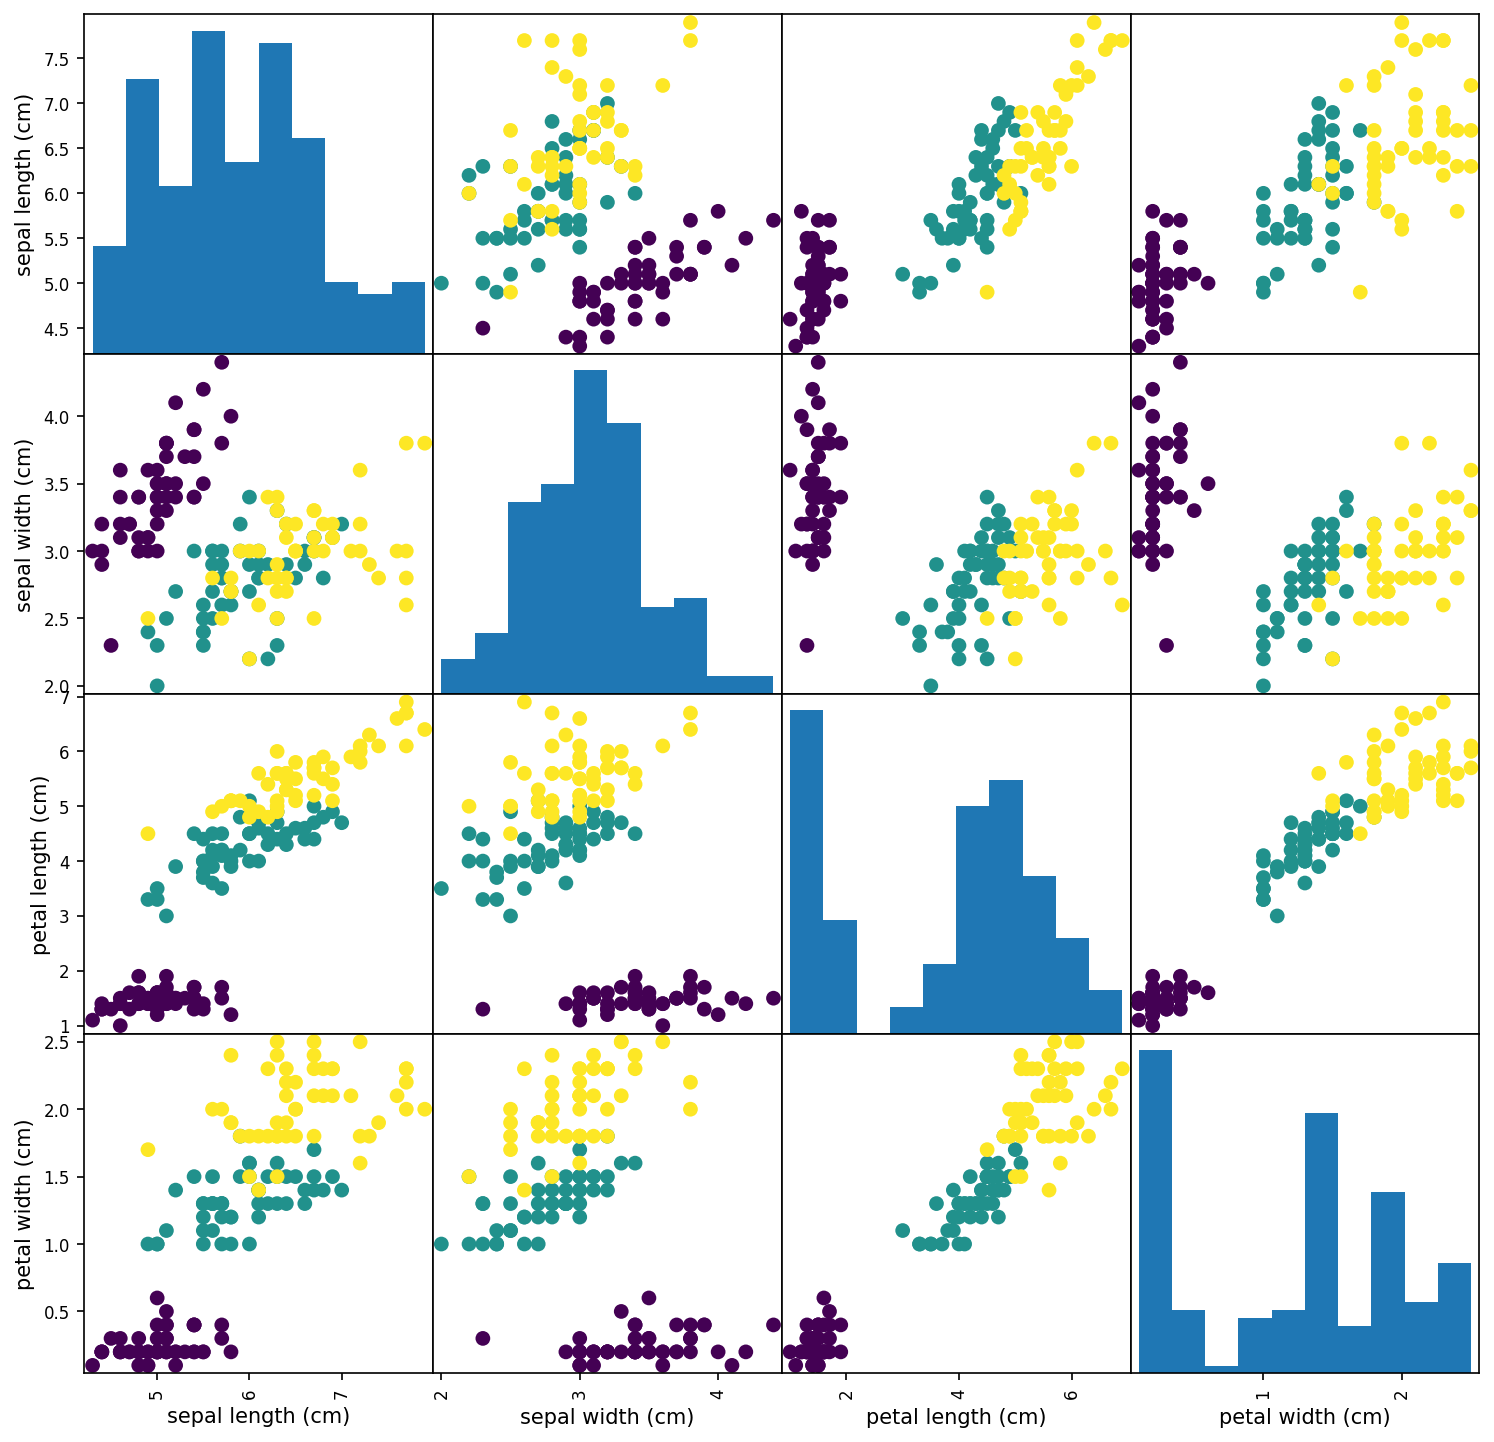

In [87]:
df = pd.DataFrame({k:X[:,i] for i,k in enumerate(iris['feature_names'])})
fig, ax = plt.subplots(figsize=(12,12), dpi=150)
pd.plotting.scatter_matrix(df, figsize=(12,12), c=y, s=200, alpha=1, ax=ax);

In [101]:
dataset = pd.read_csv("iris.csv")

In [102]:
mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
dataset["species"] = dataset["species"].apply(lambda x: mappings[x])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [103]:
X = dataset.drop("species",axis=1).values
y = dataset["species"].values

In [111]:
print(X.dtype)
print(y.dtype)

float64
int64


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [105]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [116]:
X_train

tensor([[5.2000, 2.7000, 3.9000, 1.4000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.6000, 2.8000, 4.9000, 2

In [115]:
X_train.shape

torch.Size([120, 4])

In [119]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

In [120]:
model = NN()
model

NN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

In [123]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## model training 

In [125]:
epochs = 50
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    # backprop, updating weights and biases 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 0.05966785
epoch:  1  loss: 0.05943606
epoch:  2  loss: 0.05945503
epoch:  3  loss: 0.05948066
epoch:  4  loss: 0.05929448
epoch:  5  loss: 0.05910994
epoch:  6  loss: 0.05909389
epoch:  7  loss: 0.05909235
epoch:  8  loss: 0.05896418
epoch:  9  loss: 0.05880717
epoch: 10  loss: 0.05875783
epoch: 11  loss: 0.05874776
epoch: 12  loss: 0.05865712
epoch: 13  loss: 0.05852443
epoch: 14  loss: 0.05844549
epoch: 15  loss: 0.05841723
epoch: 16  loss: 0.05836282
epoch: 17  loss: 0.05825842
epoch: 18  loss: 0.05816091
epoch: 19  loss: 0.05810522
epoch: 20  loss: 0.05806279
epoch: 21  loss: 0.05799508
epoch: 22  loss: 0.05790376
epoch: 23  loss: 0.05782202
epoch: 24  loss: 0.05776419
epoch: 25  loss: 0.05771395
epoch: 26  loss: 0.05765087
epoch: 27  loss: 0.05757290
epoch: 28  loss: 0.05749542
epoch: 29  loss: 0.05742986
epoch: 30  loss: 0.05737399
epoch: 31  loss: 0.05731757
epoch: 32  loss: 0.05725325
epoch: 33  loss: 0.05718288
epoch: 34  loss: 0.05711257
epoch: 35  loss: 0.0

In [127]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [128]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [130]:
df.head()

,Y,YHat,Correct
0,1,1,1
1,2,2,1
2,1,1,1
3,1,1,1
4,0,0,1


In [129]:
df['Correct'].sum() / len(df)

1.0

## on unknown data 

In [133]:
unknown_iris = torch.tensor([4.0,3.3,1.7,0.5])
with torch.no_grad():
    print(model(unknown_iris))
    print()
    print(labels[model(unknown_iris).argmax()])

tensor([ 11.2471,   5.5385, -15.5581])



NameError: name 'labels' is not defined